In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

#see 3d plot
from mpl_toolkits.mplot3d import Axes3D

## 1. Clustering with the **Iris** Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
#change column names to a cleaner look
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#split
train_validate, test = train_test_split(iris, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

((90, 5), (30, 5), (30, 5))

In [5]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.7,3.1,4.7,1.5,versicolor
83,5.8,2.7,3.9,1.2,versicolor
110,7.2,3.6,6.1,2.5,virginica
148,6.5,3.0,5.2,2.0,virginica
50,5.0,3.3,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [6]:
#starting w/ 2 features
X = train[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
87,3.1,1.5
83,2.7,1.2
110,3.6,2.5
148,3.0,2.0
50,3.3,0.2


In [7]:
#Scale the X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,sepal_width,petal_width
87,0.164244,0.373142
83,-0.789432,-0.038076
110,1.356340,1.743869
148,-0.074175,1.058506
50,0.641083,-1.408803


### b. Visualize the results of your clustering.

In [8]:
#define the thing
kmeans = KMeans(n_clusters=3)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       2, 1], dtype=int32)

In [9]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X)

X_scaled.head()

,sepal_width,petal_width,cluster
87,0.164244,0.373142,0
83,-0.789432,-0.038076,0
110,1.356340,1.743869,0
148,-0.074175,1.058506,0
50,0.641083,-1.408803,2


In [10]:
X_scaled.sample(10)

,sepal_width,petal_width,cluster
110,1.356340,1.743869,0
79,-0.312594,0.373142,0
52,0.402663,0.373142,0
44,1.117921,-0.860512,2
56,-0.551013,0.098997,0
41,1.117921,-1.271730,2
49,1.594759,-1.408803,2
114,-1.266271,1.058506,0
130,-0.074175,0.510215,0
68,-0.789432,-0.312221,0


In [11]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[ 0.25653561,  0.95680678],
       [-0.99895224,  0.14884157],
       [ 0.96203154, -1.32972238]])

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.256536,0.956807
1,-0.998952,0.148842
2,0.962032,-1.329722


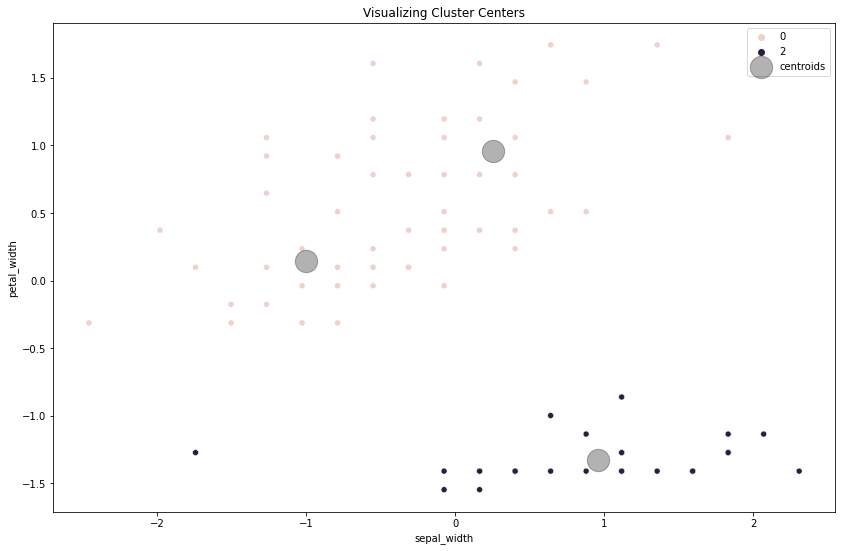

In [13]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='sepal_width', 
                y='petal_width', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='sepal_width', 
                              y='petal_width', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [14]:
#to make colors different(more contrasting): pass on a string
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster
87,0.164244,0.373142,cluster_0
83,-0.789432,-0.038076,cluster_0
110,1.356340,1.743869,cluster_0
148,-0.074175,1.058506,cluster_0
50,0.641083,-1.408803,cluster_2


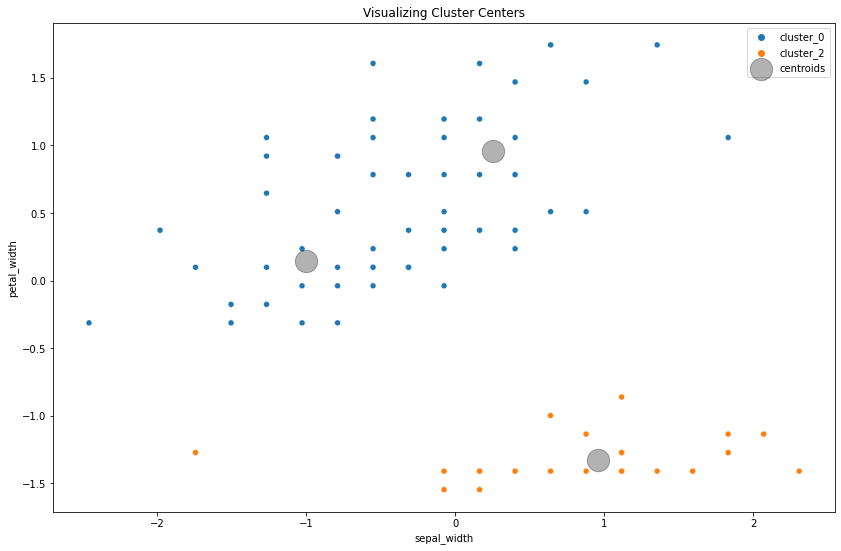

In [15]:
#rerun plot to get new colors on scaled data
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='sepal_width', 
                y='petal_width', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='sepal_width', 
                              y='petal_width', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k.

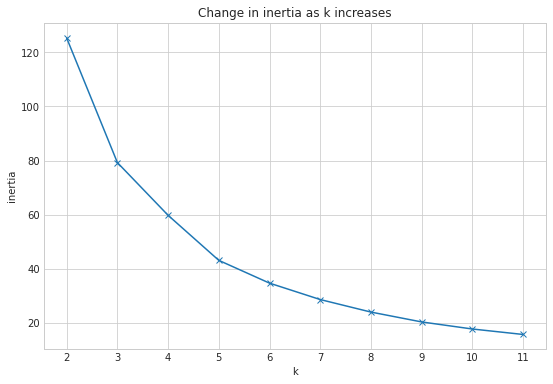

In [16]:
#start from scratch
X = iris[['sepal_width', 'petal_width']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])


#plot inertia vs k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

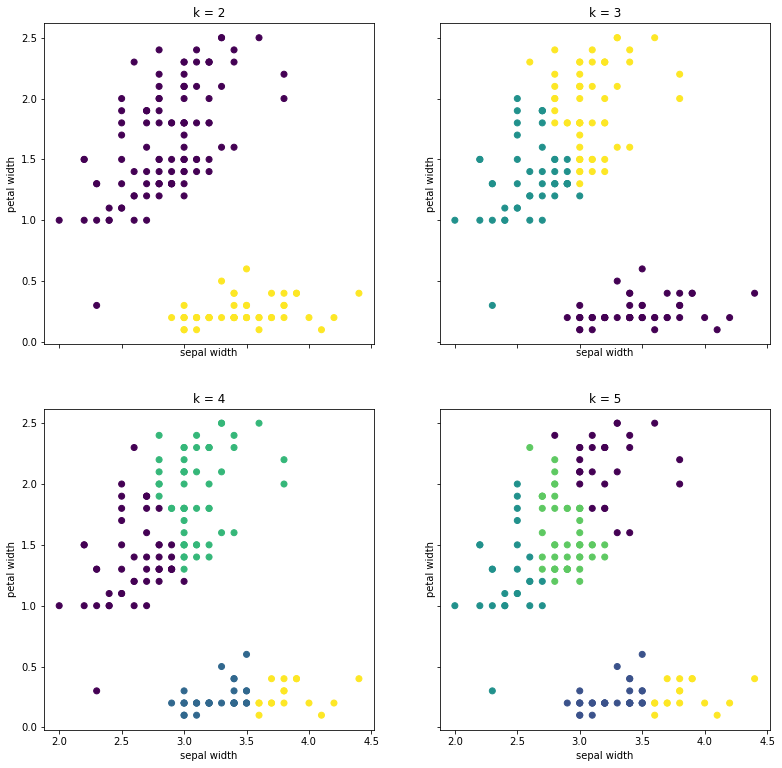

In [17]:
# What value of k is appropriate?
# can also visualize clusters

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')


### d. Repeat the clustering, this time with 3 different features.

In [18]:
#creating new feature for sepal area:
train["sepal_area"] = train.sepal_length * train.sepal_width

In [19]:
train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
87,6.7,3.1,4.7,1.5,versicolor,20.77
83,5.8,2.7,3.9,1.2,versicolor,15.66
110,7.2,3.6,6.1,2.5,virginica,25.92


In [20]:
#same process w/ 3 features this time
X = train[['petal_width', 'petal_length', 'sepal_area']]

X.head()

,petal_width,petal_length,sepal_area
87,1.5,4.7,20.77
83,1.2,3.9,15.66
110,2.5,6.1,25.92
148,2.0,5.2,19.50
50,0.2,1.4,16.50


In [21]:
#Scale the X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,petal_width,petal_length,sepal_area
87,0.373142,0.510148,0.874447
83,-0.038076,0.038638,-0.610737
110,1.743869,1.335292,2.371258
148,1.058506,0.804843,0.505331
50,-1.408803,-1.434833,-0.366597


In [22]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 3, 2, 2, 1, 3, 2, 1, 0, 1, 2, 0, 3, 3, 3, 3, 2, 3, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 3, 1, 2, 1, 2, 0, 0, 2, 3, 2, 1, 2, 0, 1, 1, 3, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 3, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 3, 3, 2, 2, 0, 1, 1, 1, 3, 2, 3, 0, 2, 3, 0, 0, 2,
       1, 0], dtype=int32)

In [23]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,petal_width,petal_length,sepal_area,cluster
87,0.373142,0.510148,0.874447,0
83,-0.038076,0.038638,-0.610737,3
110,1.743869,1.335292,2.371258,2
148,1.058506,0.804843,0.505331,2
50,-1.408803,-1.434833,-0.366597,1


In [24]:
X_scaled.sample(10)

,petal_width,petal_length,sepal_area,cluster
36,-1.408803,-1.552711,-0.511919,1
57,0.510215,0.510148,0.880260,2
74,-0.038076,0.510148,-0.198025,0
41,-1.271730,-1.493772,-0.075955,1
115,1.606797,0.745904,-0.442165,0
144,1.469724,1.217415,1.162184,2
15,-1.408803,-1.552711,1.580709,1
71,0.784360,0.569087,0.325132,0
52,0.373142,0.392271,0.790161,0
83,-0.038076,0.038638,-0.610737,3


In [25]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[ 0.49967101,  0.52828346, -0.06287572],
       [-1.32757452, -1.38899208, -0.19694817],
       [ 1.09766951,  1.09673026,  1.23346034],
       [-0.01237462,  0.04600504, -1.18439361]])

In [26]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,petal_width,petal_length,sepal_area
0,0.499671,0.528283,-0.062876
1,-1.327575,-1.388992,-0.196948
2,1.097670,1.096730,1.233460
3,-0.012375,0.046005,-1.184394


In [27]:
#pass on a string for contrasting colors
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,petal_width,petal_length,sepal_area,cluster
87,0.373142,0.510148,0.874447,cluster_0
83,-0.038076,0.038638,-0.610737,cluster_3
110,1.743869,1.335292,2.371258,cluster_2
148,1.058506,0.804843,0.505331,cluster_2
50,-1.408803,-1.434833,-0.366597,cluster_1


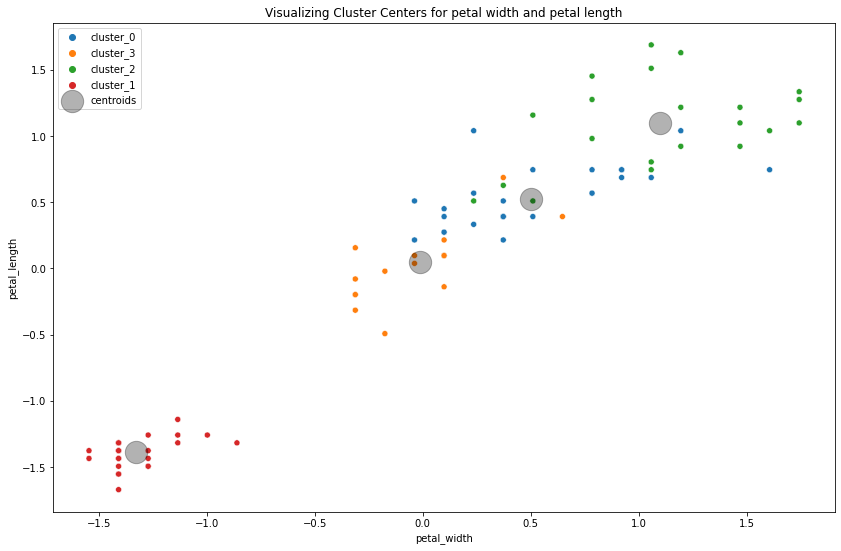

In [28]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_width', 
                y='petal_length', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', 
                              y='petal_length', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal width and petal length')
plt.legend();

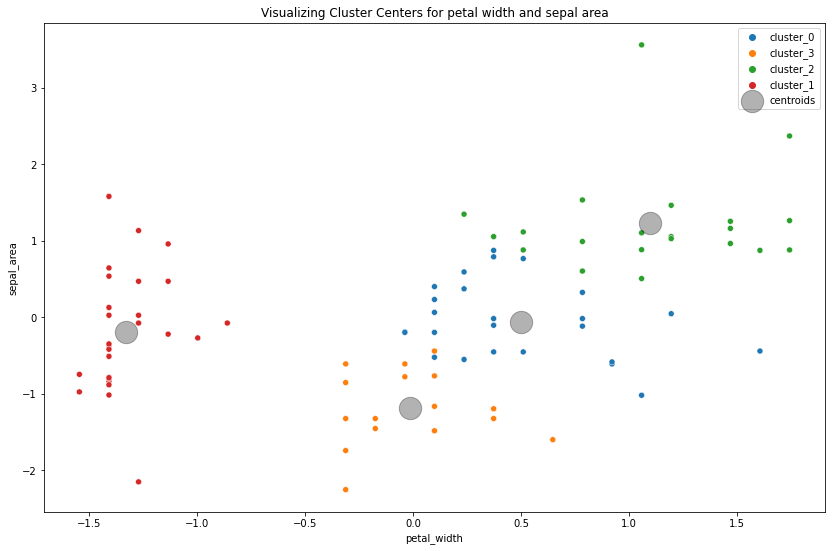

In [29]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_width', 
                y='sepal_area', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', 
                              y='sepal_area', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal width and sepal area')
plt.legend();

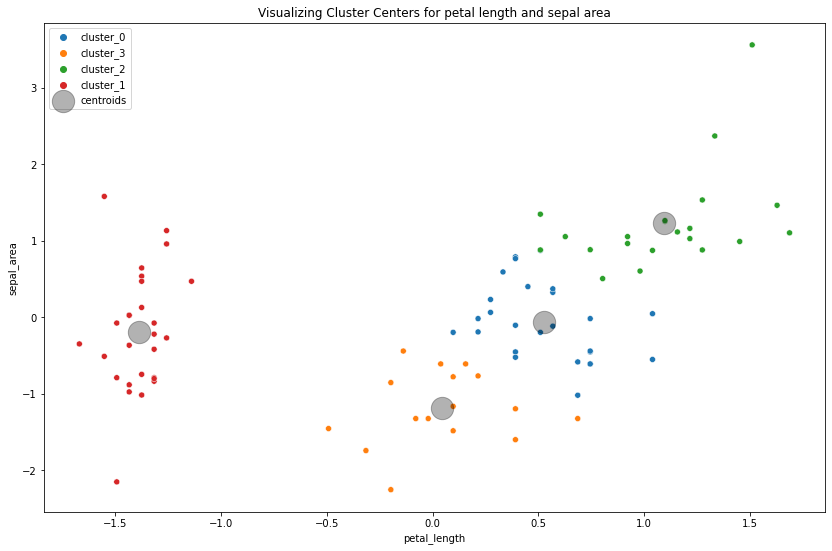

In [30]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='petal_length', 
                y='sepal_area', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_length', 
                              y='sepal_area', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for petal length and sepal area')
plt.legend();

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the **mall** customers dataset. Be sure to visualize your results!

In [31]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

df = get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [32]:
df.shape

(200, 4)

In [35]:
#split
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,Female,54,47,59
49,Female,29,40,42
25,Female,54,28,14
137,Female,44,73,7
177,Male,58,88,15


In [36]:
#start w/ 2 features
X = train[['age', 'spending_score']]
X.head()

,age,spending_score
customer_id,,
64,54,59
49,29,42
25,54,14
137,44,7
177,58,15


In [37]:
#scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,age,spending_score
64,1.035957,0.339011
49,-0.679204,-0.365248
25,1.035957,-1.525205
137,0.349893,-1.815194
177,1.310383,-1.483778


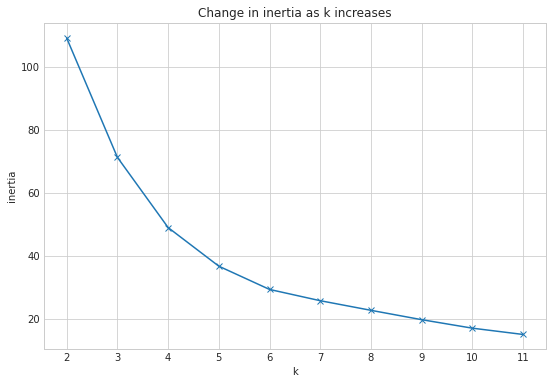

In [38]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

- elbow method shows good cluster to use is either 4 or 5

In [39]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X_scaled) 

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 1, 2, 2, 2, 1, 0, 2, 3, 0, 3, 2, 3, 3, 0, 0, 1, 2, 0, 1, 3, 2,
       1, 1, 1, 2, 0, 3, 3, 2, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2,
       2, 1, 1, 0, 3, 2, 1, 1, 2, 3, 3, 1, 3, 3, 0, 2, 1, 1, 2, 0, 3, 3,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 0, 2, 2, 0, 3, 2, 3,
       3, 0, 1, 3, 1, 1, 0, 0, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 0, 2, 2, 0,
       0, 3, 0, 0, 0, 3, 0, 2, 1, 2], dtype=int32)

In [40]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,age,spending_score,cluster
64,1.035957,0.339011,0
49,-0.679204,-0.365248,1
25,1.035957,-1.525205,2
137,0.349893,-1.815194,2
177,1.310383,-1.483778,2


In [41]:
# Cluster Centers aka centroids. Keep in mind: output is scaled

kmeans.cluster_centers_

array([[ 1.23262885, -0.10563893],
       [-0.88756392, -0.26705091],
       [ 0.47391211, -1.31647668],
       [-0.68476634,  1.2056199 ]])

In [42]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, 
                                columns = X.columns)
centroids_scaled

,age,spending_score
0,1.232629,-0.105639
1,-0.887564,-0.267051
2,0.473912,-1.316477
3,-0.684766,1.205620


In [43]:
#pass on a string for contrasting colors
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,age,spending_score,cluster
64,1.035957,0.339011,cluster_0
49,-0.679204,-0.365248,cluster_1
25,1.035957,-1.525205,cluster_2
137,0.349893,-1.815194,cluster_2
177,1.310383,-1.483778,cluster_2


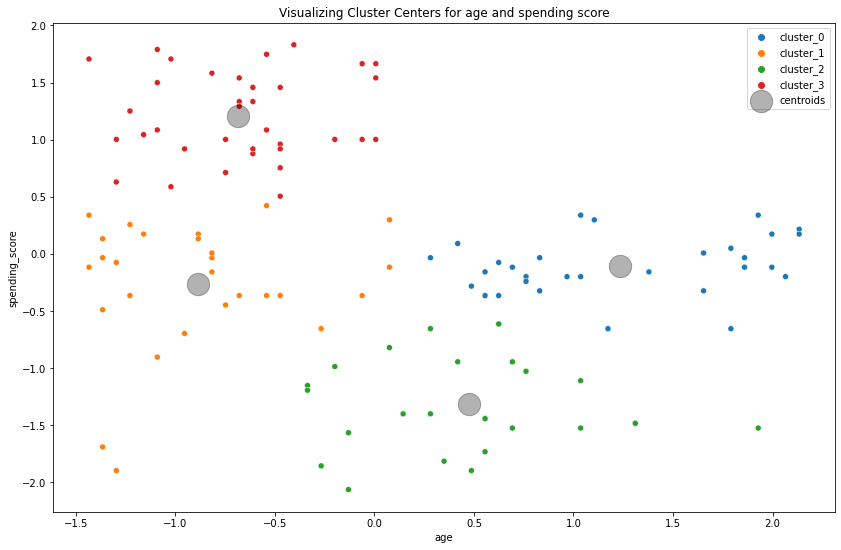

In [44]:
#visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='age', 
                y='spending_score', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='age', 
                              y='spending_score', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for age and spending score')
plt.legend();

## 3. How does scaling impact the results of clustering?Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [51]:
#restart w/ 2 features and show unscaled
X = train[['age', 'spending_score']]
X.head()

,age,spending_score
customer_id,,
64,54,59
49,29,42
25,54,14
137,44,7
177,58,15


In [52]:
#define the thing
kmeans = KMeans(n_clusters=4)
    
# fit the thing
kmeans.fit(X) 

# Use (predict using) the thing 
kmeans.predict(X)

array([2, 3, 0, 0, 0, 3, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 3, 0, 2, 3, 1, 0,
       0, 3, 3, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 3, 3, 2, 1, 0, 0, 3, 0, 1, 1, 3, 1, 1, 2, 0, 3, 3, 0, 2, 1, 1,
       3, 0, 3, 0, 3, 3, 3, 2, 3, 2, 1, 1, 1, 3, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 3, 1, 3, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 2, 3, 1, 2, 0, 2, 2,
       2, 3, 2, 2, 2, 1, 2, 0, 3, 0], dtype=int32)

In [53]:
X['cluster'] = kmeans.predict(X)
X.head()

,age,spending_score,cluster
customer_id,,,
64,54,59,2
49,29,42,3
25,54,14,0
137,44,7,0
177,58,15,0


In [56]:
#centroids for unscaled data
centroids = X.groupby('cluster')['age', 'spending_score'].mean()
centroids

,age,spending_score
cluster,,
0,43.640000,16.120000
1,28.833333,80.388889
2,55.909091,47.121212
3,26.692308,47.923077


In [57]:
#pass on a string for contrasting colors
X['cluster'] = 'cluster_' + X.cluster.astype(str)
X.head()

,age,spending_score,cluster
customer_id,,,
64,54,59,cluster_2
49,29,42,cluster_3
25,54,14,cluster_0
137,44,7,cluster_0
177,58,15,cluster_0


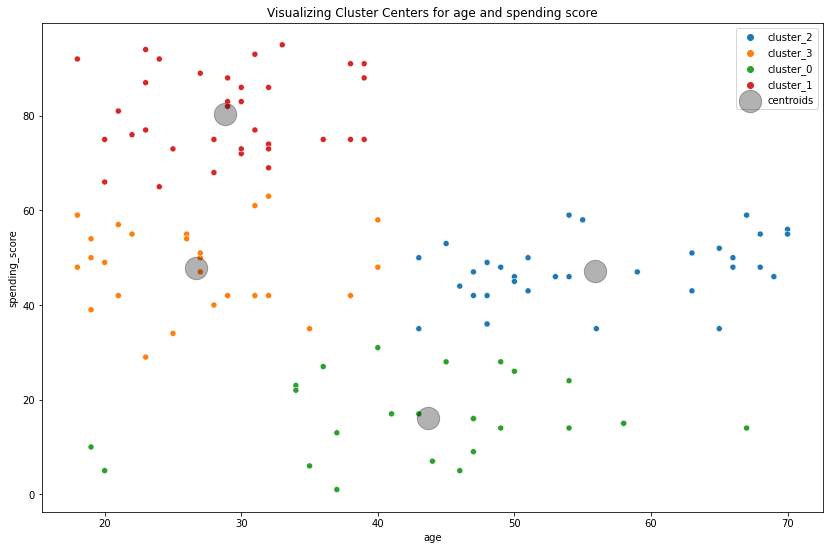

In [58]:
#visualize the clusters along with the centers on unscaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='age', 
                y='spending_score', 
                data=X, 
                hue='cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x='age', 
                              y='spending_score', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for age and spending score')
plt.legend();

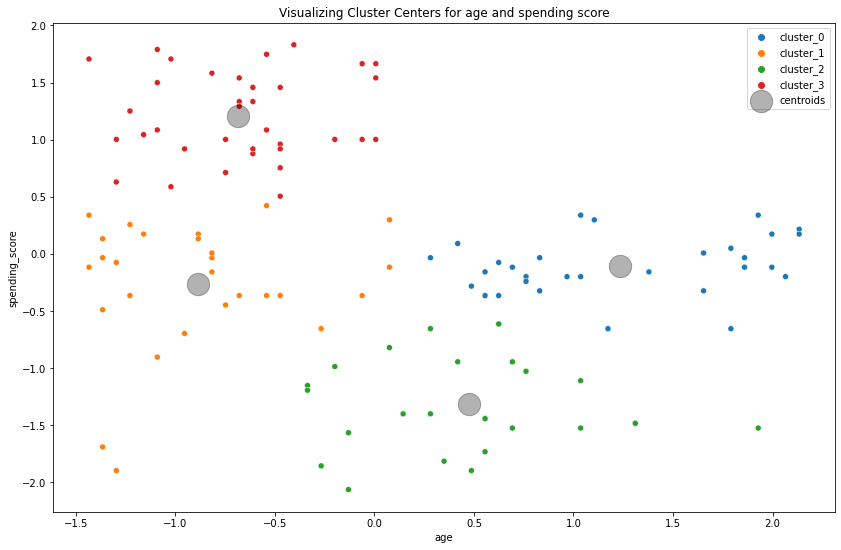

In [59]:
#re-visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatterplot of data with hue for cluster
sns.scatterplot(x='age', 
                y='spending_score', 
                data=X_scaled, 
                hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='age', 
                              y='spending_score', 
                              ax=plt.gca(), 
                              color='k', 
                              alpha=0.3, 
                              s=500, 
                              marker='o', 
                              label='centroids')

plt.title('Visualizing Cluster Centers for age and spending score')
plt.legend();